In [11]:
#hide
from fastbook import *
from fastai.vision.widgets import *

https://www.kaggle.com/datasets/vic006/beginner/data?select=train

In [12]:
pip install fastbook

Note: you may need to restart the kernel to use updated packages.


In [19]:
key = "/kaggle/input/beginner/train"

In [14]:
key = os.environ.get('AZURE_SEARCH_KEY', 'XXX')

In [20]:
search_images_bing

<function fastbook.search_images_bing(key, term, min_sz=128, max_images=150)>

In [21]:
results = "/kaggle/input/beginner/train/train/Img-1.jpg"
ims = "/kaggle/input/beginner/train/train"
len(ims)

34

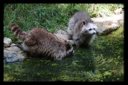

In [22]:
dest = "/kaggle/input/beginner/test/test/Img-1019.jpg"
# download_url(ims[0],dest)

im = Image.open(dest)
im.to_thumb(128,128)

In [23]:
bear_types = "grizzly","black","teddy"
path = Path("bears")
if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key,f"{o} bear")
        dowbload_images(dest,urls=results.attrgot("content_url"))

In [24]:
fns = get_image_files(path)
fns

(#0) []

In [25]:
failed = verify_images(fns)
failed

(#0) []

In [26]:
failed.map(Path.unlink)

(#0) []

In [27]:
class DataLoaders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self,i): return self.loaders[i]
    train, valid = add_props(lambda i, self: self[i])

In [28]:
bears = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [29]:
blocks = (ImageBlock, CategoryBlock)

In [30]:
get_items = get_image_files

In [31]:
splitter = RandomSplitter(valid_pct=0.2,seed=42)

In [32]:
get_y = parent_label

In [33]:
item_tfms = Resize(128)

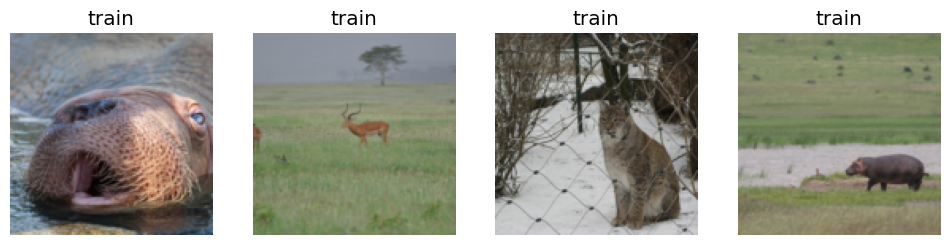

In [34]:
dls = bears.dataloaders("/kaggle/input/beginner/train/train")
dls.valid.show_batch(max_n=4, nrows=1)

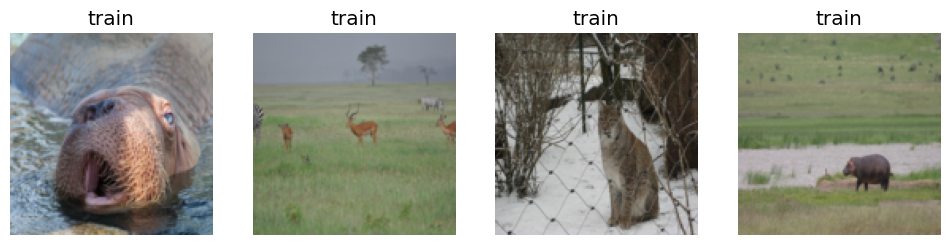

In [35]:
bears = bears.new(item_tfms=Resize(128,ResizeMethod.Squish))
dls = bears.dataloaders("/kaggle/input/beginner/train/train")
dls.valid.show_batch(max_n=4,nrows=1)

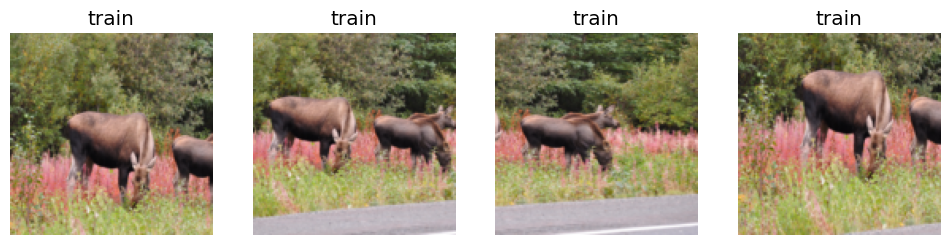

In [36]:
bears = bears.new(item_tfms=RandomResizedCrop(128,min_scale=0.3))
dls = bears.dataloaders("/kaggle/input/beginner/train")
dls.train.show_batch(max_n=4,nrows=1,unique=True)

### Data Augmentation

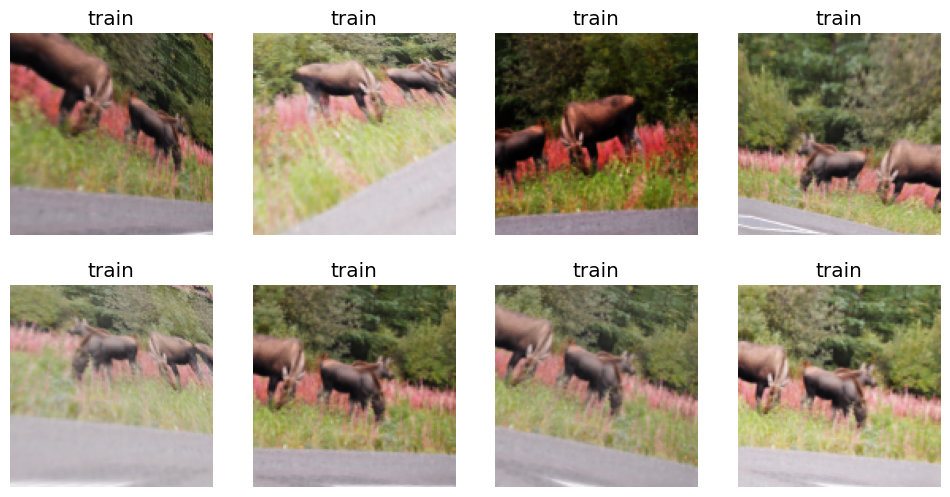

In [37]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders("/kaggle/input/beginner/train")
dls.train.show_batch(max_n=8,nrows=2,unique=True)

In [38]:
bears=bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)
dls = bears.dataloaders("/kaggle/input/beginner/train")

learn = cnn_learner(dls,resnet18,metrics=error_rate)
learn.fine_tune(4)

/opt/conda/lib/python3.10/site-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 142MB/s] 


epoch,train_loss,valid_loss,error_rate,time
0,0.000000,0.000000,0.000000,01:37


epoch,train_loss,valid_loss,error_rate,time
0,0.000000,0.000000,0.000000,01:19
1,0.000000,0.000000,0.000000,01:20
2,0.000000,0.000000,0.000000,01:20
3,0.000000,0.000000,0.000000,01:20


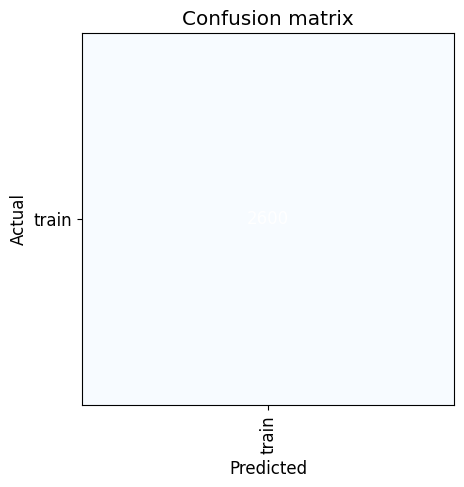

In [39]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

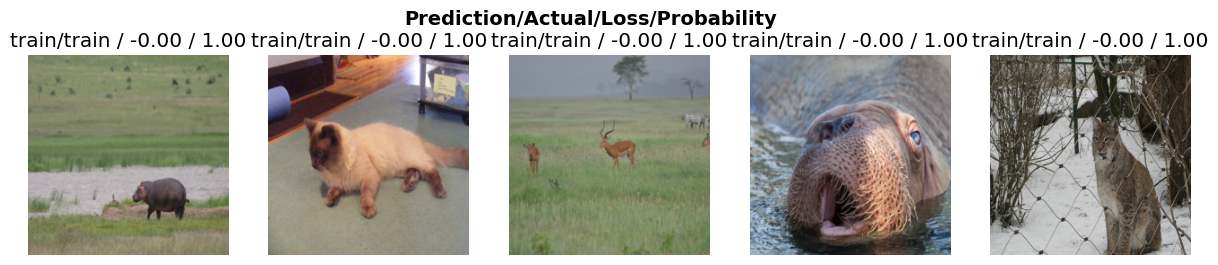

In [40]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [ ]:
for idx, cat in cleaner.change(): shutil.move(str(cleaner.fns[idx], path/cat))

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts=".pkl")

(#1) [Path('export.pkl')]

In [46]:
learn_inf = load_learner(path/"export.pkl")

In [47]:
learn_inf.predict("/kaggle/input/beginner/test/test/Img-1001.jpg")

('train', tensor(0), tensor([1.]))

In [48]:
learn_inf.dls.vocab

['train']

In [49]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [50]:
img = PILImage.create(btn_upload.data[-1])

In [51]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl : display(img.to_thumb(128,128))
out_pl

Output()

In [55]:
pred, pred_idx, probs = learn_inf.predict(img)

In [56]:
ibl_pred = widgets.Label()
ibl_pred.value = f"Prediction: {pred}; Probability: {probs[pred_idx]:.04f}"
ibl_pred

Label(value='Prediction: train; Probability: 1.0000')

In [57]:
btn_run = widgets.Button(description="Classify")
btn_run

Button(description='Classify', style=ButtonStyle())

In [59]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])

    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred, pred_idx, probs = learn_inf.predict(img)
    ibl_pred.value = f"Prediction : {pred}; Probability: {probs[pred_idx]:.04f}"
    
btn_run.on_click(on_click_classify)

In [60]:
VBox([widgets.Label("select your bear !"),
     btn_upload, btn_run,out_pl, ibl_pred])